# 4. Example: Download era5 from Google Cloud

DataAssimBench provides interfaces to ECWMF ERA5 data hosted on Google Cloud.

In this example, we'll walk through loading data from Google Cloud into a dabench data object.

### Part I: Imports and Model Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import dabench as dab

To start, let's download air temp data over the state of Colorado for the first half of 2020. 

Note: If you don't specify any of these options, the model object will use defaults, which are air temp at 2 metres for 2020 over Cuba. While you can download global data via this interface, it is not recommended (except for over very short time periods) due to the data volume.

In [2]:
# The model object is defined in the same way as the model data generators (e.g. Lorenz63).
# But the options vary a bit. In this case we can specify which variables and years to load
# and set a bounding box
gcp_loader = dab.data.GCP(variables = ['2m_temperature'], 
                       min_lat = 36.992426, max_lat = 41.003444, 
                       min_lon = -109.060253, max_lon = -102.041524,
                       date_start='2020-01-01', date_end='2020-06-30'
                      )

In [3]:
# To download the data, we can use gcp_loader.load()
# gcp_loader.generate() also works, but is just a wrapper around load()
# Depending on your connection, this may take a few minutes
gcp_loader.load()

### Part II: Examining and Visualizing Data

The process for accessing and visualizing the data is much the same as it is for the other data objects (e.g. models)

In [4]:
# In this case, we have 4368 timesteps (24 hours for 182 days)
print(gcp_loader.values.shape)
print(gcp_loader.values)

(4368, 476)
[[260.73407 258.55048 258.115   ... 275.66376 275.90997 276.0577 ]
 [260.51556 258.48276 258.04727 ... 274.365   274.842   275.22058]
 [260.9018  259.77383 259.3291  ... 273.0616  273.45862 273.7941 ]
 ...
 [288.91785 289.478   290.46002 ... 309.58032 310.38904 311.16275]
 [286.36743 287.7188  290.17468 ... 309.36502 310.17548 310.8494 ]
 [287.78705 287.81506 288.69205 ... 308.9659  309.76413 310.4748 ]]


In [5]:
# We can access those timesteps directly:
print(gcp_loader.times)

['2020-01-01T00:00:00.000000000' '2020-01-01T01:00:00.000000000'
 '2020-01-01T02:00:00.000000000' ... '2020-06-30T21:00:00.000000000'
 '2020-06-30T22:00:00.000000000' '2020-06-30T23:00:00.000000000']


In [6]:
# Get the values in their original 2D gridded format
print(gcp_loader.values_gridded.shape)

(4368, 17, 28)


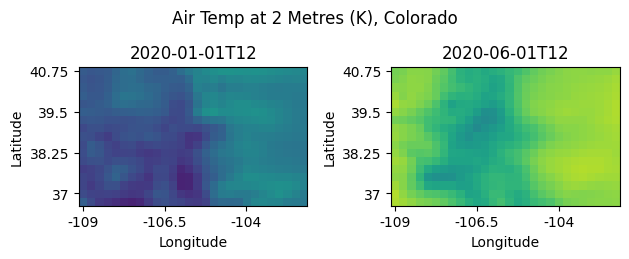

In [7]:
# Now let's compare air temp in January vs June over Colorado
fig, ax = plt.subplots(1, 2)
fig.suptitle('Air Temp at 2 Metres (K), Colorado')
ax[0].imshow(gcp_loader.values_gridded[12], vmin=250, vmax=300)
ax[0].set_title(np.datetime_as_string(gcp_loader.times[12], unit='h')); ax[0].set_xlabel('Longitude'); ax[0].set_ylabel('Latitude')
ax[0].set_yticks(ticks=[0, 5, 10, 15], labels=[40.75, 39.5, 38.25, 37]); ax[0].set_xticks(ticks=[0, 10, 20], labels=[-109, -106.5, -104])
ax[1].imshow(gcp_loader.values_gridded[3660], vmin=250, vmax=300)
ax[1].set_title(np.datetime_as_string(gcp_loader.times[3660], unit='h')); ax[1].set_xlabel('Longitude'); ax[1].set_ylabel('Latitude')
ax[1].set_yticks(ticks=[0, 5, 10, 15], labels=[40.75, 39.5, 38.25, 37]); ax[1].set_xticks(ticks=[0, 10, 20], labels=[-109, -106.5, -104])
fig.tight_layout()
fig.subplots_adjust(top=1.4)
plt.show()

### Part III: Customizing data download options

This interface is highly flexible. ERA5 offers many different variables that can be used. Multiple variables can be loaded at the same time.

You can find the full list of variables here: https://github.com/google-research/arco-era5?tab=readme-ov-file#full_37-1h-0p25deg-chunk-1zarr-v3

Let's load air pressure and sea surface temperature data over Cuba (the default bounding box) for July 1979.

In [8]:
# Cuba is the default bounding box so we don't need to specify that
cuba_loader = dab.data.GCP(variables = ['mean_sea_level_pressure', 'sea_surface_temperature'], 
                       date_start='1979-07-01', date_end='1979-07-31'
                      )
cuba_loader.load()

Let's look at the shape of our data

In this case, we have:
- timesteps = 744 (24 hrs x 31 days)
- x dim = 13
- y dim = 43
- variables = 2

In [9]:
print(cuba_loader.values_gridded.shape)

(744, 13, 43, 2)


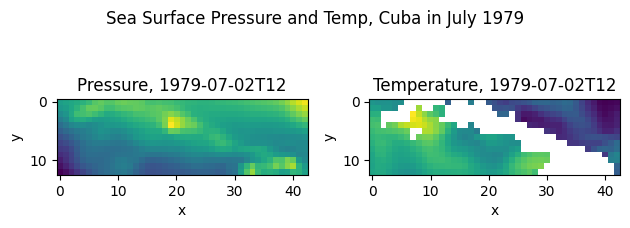

In [10]:
# Now let's plot sea surface temp and pressure next to each other in July
fig, ax = plt.subplots(1, 2)
fig.suptitle('Sea Surface Pressure and Temp, Cuba in July 1979')
ax[0].imshow(cuba_loader.values_gridded[36, :, :, 0])
ax[0].set_title('Pressure, ' + np.datetime_as_string(cuba_loader.times[36], unit='h')); ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].imshow(cuba_loader.values_gridded[36, :, :, 1])
ax[1].set_title('Temperature, ' + np.datetime_as_string(cuba_loader.times[36], unit='h')); ax[1].set_xlabel('x'); ax[1].set_ylabel('y')
fig.tight_layout()
fig.subplots_adjust(top=1.4)
plt.show()

A couple things to note:
1. Notice that pressures are lower and temps are higher to the Southwest vs. the Northeast
2. Sea surface temperature is not defined over land